# Are Movie Lengths in Decline?
This mini-project is attempting to determine whether or not movie lengths have decreased over time. I will initally make use of some basic aggregates in the form of lists for the years 2011-2020. I will then move on to the larger Netflix dataset, which has nearly 8000 rows of data.

### Aggregate Tasks:
1. Turn basic aggregates into lists and the combine then into a dictionary
2. Convert dictionary into a DataFrame
3. Produce a graph detailing the trend of aggregate data

### Netflix Tasks:
1. Load in the full dataset as a DataFrame
2. Filter the DataFrame to represent only Movies
3. Create a subset of the DataFrame to exclude extraneous columns
4. Because we're now working with individual movies and not aggregates, a line plot is no longer suitable. Create a scatter plot
5. Many short movies have been released in the last two decades, and many of these are under an hour long. Filter the DataFrame for movies with a duration under 60 minutes to see what is pulling down the average
6. We can see that many of the films under 60 minutes are genres such as 'Children', 'Stand-up', and 'Documentaries'; which makes sense as these types of films are typically shorter than 90 minutes. Iterate through the DataFrame and create a colors list to mark each of these genres with a different color.
7. Plot the scatter plot again with the appropriate coloring

In [19]:
# Turning basic aggregates into lists for manipulation
years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
durations = [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]

movie_dict = {'years': years, 'durations': durations}

# Print the dictionary
movie_dict

{'years': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
 'durations': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}

In [20]:
# Convert dictionary into DataFrame
import pandas as pd
durations_df = pd.DataFrame(movie_dict)
print(durations_df)

   years  durations
0   2011        103
1   2012        101
2   2013         99
3   2014        100
4   2015        100
5   2016         95
6   2017         95
7   2018         96
8   2019         93
9   2020         90


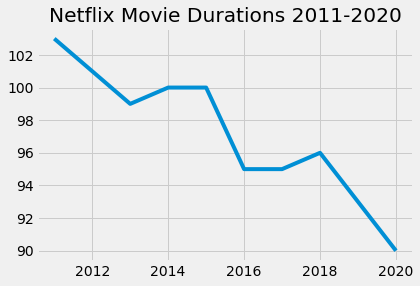

In [21]:
# Create aggregate line plot
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(durations_df['years'], durations)
plt.title('Netflix Movie Durations 2011-2020')
plt.show()

### Aggregate Conclusion
The above line chart clearly indicates that are time has progressed, movie duration has decreased, at least according to the aggregated data. However, this data sample is small we need the rest of the data to draw a conclusion.

In [22]:
# Pull in the rest of the data as a DataFrame, inspect first five rows
netflix_df = pd.read_csv('netflix_data.csv')
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [23]:
# Subset the DataFrame for Movies and the columns of interest
netflix_df_movies_only = netflix_df[netflix_df['type'] == 'Movie']
netflix_movies_col_subset = netflix_df_movies_only[['title', 'country', 'genre', 'release_year', 'duration']]
netflix_movies_col_subset.head()

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


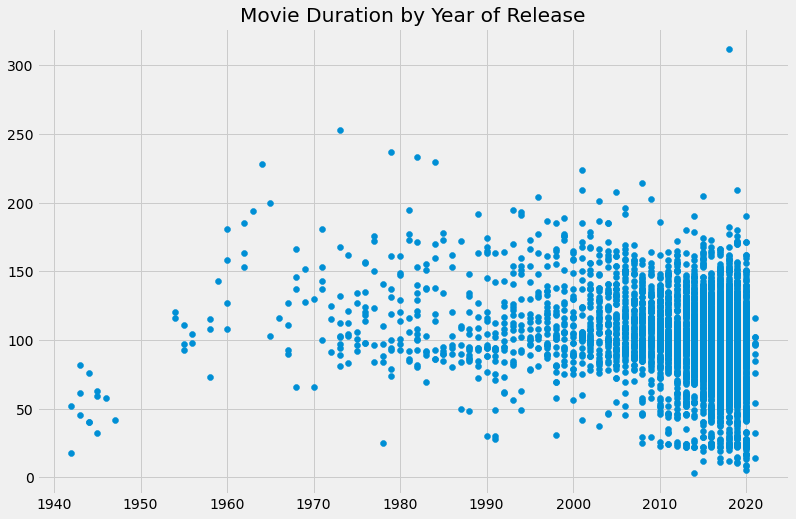

In [24]:
# Create scatter plot with the the full dataset
fig = plt.figure(figsize=(12,8))
plt.scatter(netflix_movies_col_subset['release_year'], netflix_movies_col_subset['duration'])
plt.title('Movie Duration by Year of Release')
plt.show()

In [25]:
# Filter for durations shorter than 60 minutes
short_movies = netflix_movies_col_subset[netflix_movies_col_subset['duration'] < 60]
short_movies.head(20)

,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28
162,A Christmas Special: Miraculous: Tales of Lady...,France,Uncategorized,2016,22
171,A Family Reunion Christmas,United States,Uncategorized,2019,29
177,A Go! Go! Cory Carson Christmas,United States,Children,2020,22
178,A Go! Go! Cory Carson Halloween,NaN,Children,2020,22
179,A Go! Go! Cory Carson Summer Camp,NaN,Children,2020,21


In [26]:
# Iterate over rows of netflix_movies_col_subset and determine color spread
colors = []

for label, row in netflix_movies_col_subset.iterrows() :
    if row['genre'] == 'Children' :
        colors.append('red')
    elif row['genre'] ==  'Documentaries':
        colors.append('blue')
    elif row['genre'] == 'Stand-Up' :
        colors.append('green')
    else:
        colors.append('black')
             
print(colors[0:10])

['black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'blue']


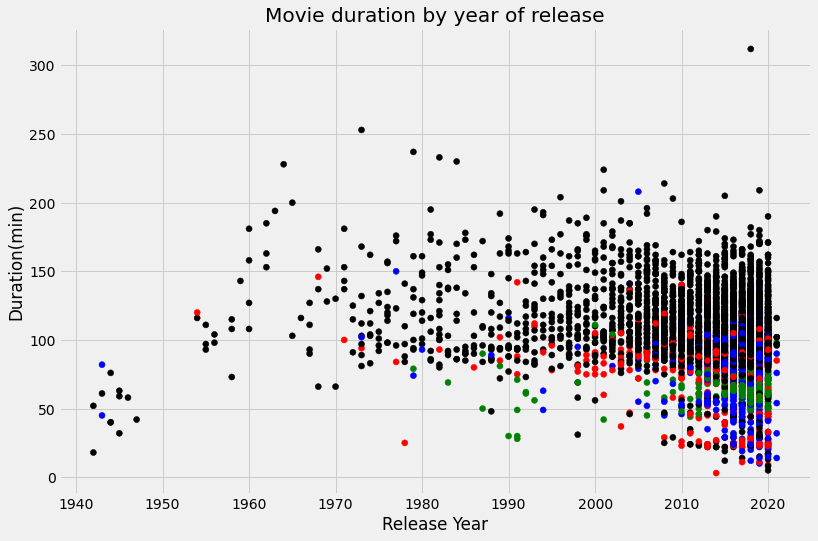

In [27]:
# Create new scatter plot with the assigned color
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))

plt.scatter(netflix_movies_col_subset['release_year'], netflix_movies_col_subset['duration'], c = colors)
plt.title('Movie duration by year of release')
plt.xlabel('Release Year') 
plt.ylabel('Duration(min)')
plt.show()

## Conclusion
As suspected, non-typical genres such as children's movies and documentaries are clustered toward the bottom of the graph. In general it looks like movie duration has not gone down over time, but with this level of analysis the end result is inconclusive.